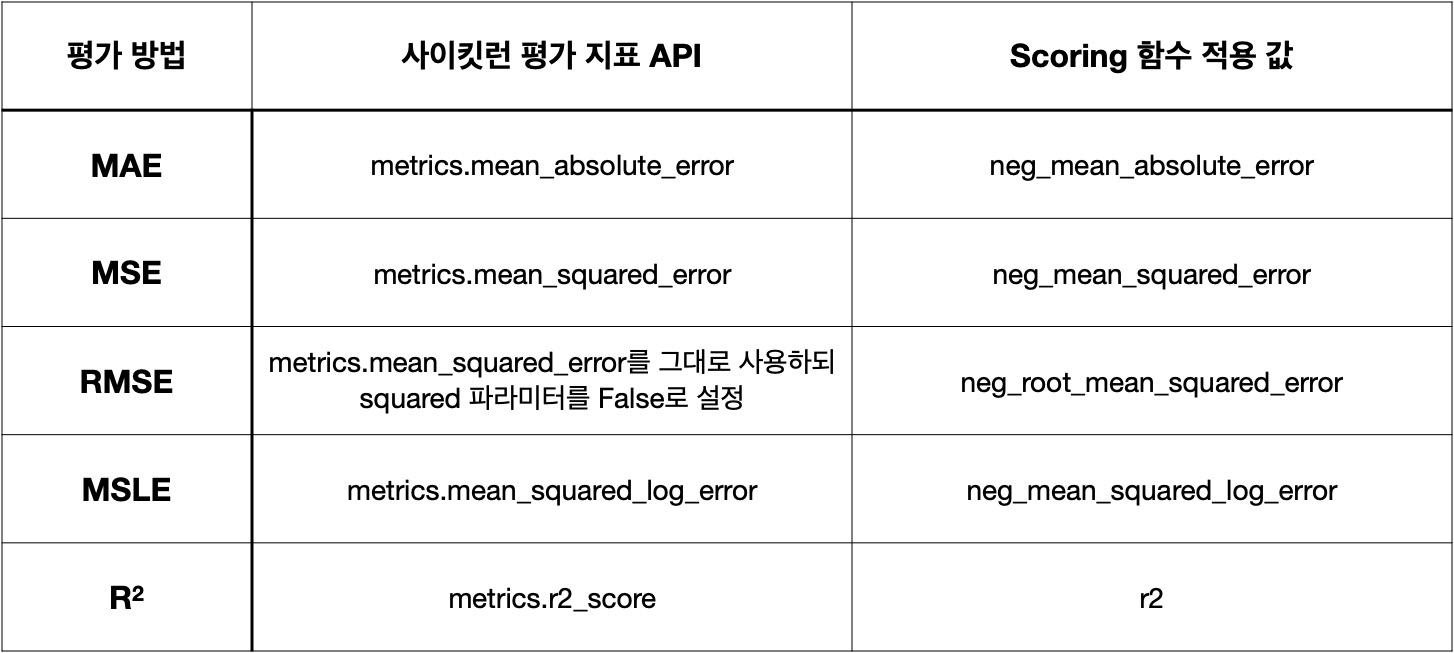

In [7]:
from IPython.display import Image

Image('eval_api.jpg', width = 600)

### LinearModel

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston dataset의 target은 주택가격
bostonDF['price'] = boston.target
print('Boston dataset 크기 : ', bostonDF.shape)
bostonDF.head()

Boston dataset 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- CRIM : 범죄 발생률
- ZN : 25,000평방 비트를 초과하는 거주 지역의 비율
- INDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수 (강 근처 : 1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 거주 가능한 방의 수
- AGE : 1940년 이전에 건ㅊㄱ된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중 거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000달러당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역의 흑인 거주비율
- LSTAT : 하위계층의 비율

- 각 컬럼별 주택가격에 미치는 영향도를 조사

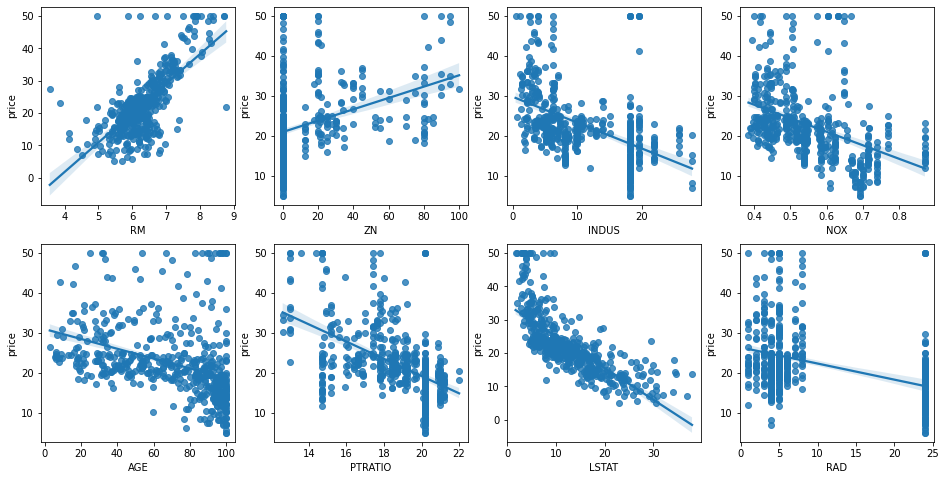

In [9]:
f, ax = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    #regplot : 산점도 + 선형 회귀 직선
    sns.regplot(x = feature, y = 'price', data = bostonDF, ax = ax[row][col])

- 학습/예측/평가 수행

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['price']
X_data = bostonDF.drop(['price'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [14]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수값 : ', np.round(lr.coef_, 1))

절편 값 :  40.995595172165
회귀 계수값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [17]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

- NOX값 처럼 다른 feature값에 비해 값이 크면 과적합을 유도할 feature일 수 있음

In [18]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['price']
X_data = bostonDF.drop(['price'], axis = 1, inplace = False)
lr = LinearRegression()

# cross_val_score()로 5 Fold 셋으로 MSE를 구한 뒤 이를 기반으로 다시 RMSE구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring = 'neg_mean_squared_error')로 반환된 값은 모두 함수
print('5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE socres : ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE socres :  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829


### Polynomial Regression

- PolynomialFeatures 클래스로 다항식 변환

In [21]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]] 의 2x2 행렬
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature : \n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeature를 이용하여 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature : \n', poly_ftr)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


- 사이킷런 파이프라인(pipeline)을 이용하여 3차 다항회귀 학습

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

# Pipeline객체로 Streamline하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                 ('linear', LinearRegression())])

X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


- 보스턴 주택가격 예측 예제

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['price'] = boston.target
print('boston dataset shape : ', bostonDF.shape)

y_target = bostonDF['price']
X_data = bostonDF.drop(['price'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

# Pipeline을 이용하여 PolynomialFeature 변환과 LinearRegression 적용을 순차적으로 결합
p_model = Pipeline([('poly', PolynomialFeatures(degree = 3, include_bias = False)),
                   ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {0:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

boston dataset shape :  (506, 14)
MSE : 79625.594, RMSE : 79625.594
Variance score : -1116.598


- 다차항은 이처럼 overfitting 의 가능성이 다분히 높다.
- degree의 수를 조금만 높여도 위와 같은 과적합 문제가 발생할 수 있으니 주의할것